Key Points
Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

Your tasks in this project are as follows:

Data wrangling, which consists of:
- Gathering data
- Assessing data
- Cleaning data   


Storing, analyzing, and visualizing your wrangled data       
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

### File 1. Enhanced Twitter Archive  

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

In [2]:
df_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### File 2. The tweet image predictions using url

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
#the name of the file
url.split("/")[-1]

'image-predictions.tsv'

In [5]:
#create a file named 'image-predictions.tsv' with mode 'wb' (binary)
with open(url.split("/")[-1],"wb") as file:
    file.write(response.content)
    
#check if file is created
os.path.exists('image-predictions.tsv')

True

In [6]:
#read tsv file using pandas read_csv with seperator \t
df_pred=pd.read_csv("image-predictions.tsv", sep = "\t")
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### File 3. Additional Data via the Twitter API

Using the WeRateDogs Twitter archive and specifically the tweet IDs within it, I query Twitter's API to gather this additional data including retweet count, favorite count, user id, friends count, and followers count. 

In [7]:
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
api.get_status(892420643555336193, tweet_mode='extended')._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

Get `retweet_count`,`favorite_count`,`user_id`,`friends_count`and `followers_count` from Tweeter API._json

In [10]:
id_list = list(df_enhanced.tweet_id)
tweet_df,no_stats = {},{}
start_time = timeit.default_timer()
for tweetid in id_list:
    try:
        status = api.get_status(tweetid, tweet_mode='extended')._json
        tweet_df[tweetid] = {'retweet_count':status['retweet_count'],
                             'favorite_count':status['favorite_count'],
                             'user_id':status['user']['id'],
                             'friends_count':status['user']['friends_count'],
                             'followers_count':status['user']['followers_count']}
    except:
        no_stats[tweetid] = 'no status'      

print("Completed! Running Time: {:.2f} seconds".format(timeit.default_timer()- start_time))

Rate limit reached. Sleeping for: 672
Rate limit reached. Sleeping for: 681


Completed! Running Time: 1929.09 seconds


In [73]:
#save tweeter extract to tweet_json
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_df, file)

Transform dictionary into Pandas DataFrame

In [16]:
retweet_df = pd.DataFrame.from_dict(tweet_df, orient = 'index')
retweet_df.reset_index(inplace=True)
retweet_df.rename(columns = {'index':'tweet_id'},inplace = True)
retweet_df.head()

,tweet_id,retweet_count,favorite_count,user_id,friends_count,followers_count
0,666020888022790149,445,2349,4196983835,18,8947131
1,666029285002620928,41,118,4196983835,18,8947131
2,666033412701032449,39,107,4196983835,18,8947131
3,666044226329800704,122,261,4196983835,18,8947131
4,666049248165822465,38,94,4196983835,18,8947131


In [17]:
len(id_list)

2356

In [18]:
len(no_stats.keys())

25

### Accessing Data

#### Enhanced Twitter Archive
`Quality`:
- timestamp and retweeted_status_timestamp should be datetime object instead of objects
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be floats
- tweet id (#835246439529840640) has a rating denominator of $0$.
- expanded_urls has duplicates within some cells.
- In columns like name, doggo, floofer, pupper, puppo, NA is marked as "None".
- In name column, there are 55 names showing "a".
- get prediction with highest confidence and reduce columns.

`Tidiness`: 
- source is too long: needs succinct and short version. For example,`<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'` or `'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>`
- text column contains links to the tweet

In [20]:
pd.set_option("display.max_colwidth", -1)

In [21]:
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [22]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df_enhanced.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [24]:
sum(df_enhanced.duplicated())

0

In [25]:
df_enhanced.expanded_urls.sample(10)

667     https://twitter.com/dog_rates/status/790337589677002753/photo/1                                                                                                                                                                                                
302     https://twitter.com/SchafeBacon2016/status/836648149003485187/photo/1                                                                                                                                                                                          
2175    https://twitter.com/dog_rates/status/669214165781868544/photo/1                                                                                                                                                                                                
246     https://twitter.com/dog_rates/status/845677943972139009/photo/1                                                                                                                                         

In [26]:
df_enhanced.in_reply_to_status_id.sample(10)

802    NaN
1678   NaN
1972   NaN
1787   NaN
666    NaN
2289   NaN
2293   NaN
694    NaN
2340   NaN
925    NaN
Name: in_reply_to_status_id, dtype: float64

In [27]:
df_enhanced.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [28]:
df_enhanced[df_enhanced.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [29]:
df_enhanced.name.value_counts()[:10]

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Lola       10 
Penny      10 
Tucker     10 
Winston    9  
Name: name, dtype: int64

In [30]:
df_enhanced.doggo.value_counts()[:10]

None     2259
doggo    97  
Name: doggo, dtype: int64

In [31]:
df_enhanced.floofer.value_counts()[:10]

None       2346
floofer    10  
Name: floofer, dtype: int64

In [32]:
df_enhanced.pupper.value_counts()[:10]

None      2099
pupper    257 
Name: pupper, dtype: int64

In [33]:
df_enhanced.puppo.value_counts()[:10]

None     2326
puppo    30  
Name: puppo, dtype: int64

#### The tweet image predictions
`Quality`:
- id column should be string
- predictions are a mix of upper and lower case
- 2075 tweet id has images

`Tidiness`: 
- all 2075 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

In [34]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
df_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1495,783347506784731136,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,toy_poodle,0.621780,True,miniature_poodle,0.197819,True,soft-coated_wheaten_terrier,0.046745,True
1862,842765311967449089,https://pbs.twimg.com/media/C7IalMVX0AATKRD.jpg,1,tub,0.665238,False,bucket,0.105166,False,Labrador_retriever,0.029340,True
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False
1902,851861385021730816,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
1586,797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American_Staffordshire_terrier,0.489845,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True


In [36]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
df_pred.tweet_id.nunique()

2075

In [38]:
pred_id = set(df_pred.tweet_id)
archive_id = set(df_enhanced.tweet_id)
common_id = pred_id.intersection(archive_id)
print("prediction data has {} tweet ids, enhanced data has {} tweet ids, and they share {} common tweet ids."\
      .format(len(pred_id),len(archive_id),len(common_id)))

prediction data has 2075 tweet ids, enhanced data has 2356 tweet ids, and they share 2075 common tweet ids.


#### Additional Data via the Twitter API
`Quality`:
- only 2331 tweet id has status

`Tidiness`: 
- all 2331 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

In [39]:
retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id           2331 non-null int64
retweet_count      2331 non-null int64
favorite_count     2331 non-null int64
user_id            2331 non-null int64
friends_count      2331 non-null int64
followers_count    2331 non-null int64
dtypes: int64(6)
memory usage: 109.3 KB


In [40]:
len(id_list)

2356

In [41]:
len(no_stats.keys())

25

### Cleaning Data

#### Enhanced Twitter Archive
`Quality`:
- timestamp and retweeted_status_timestamp should be datetime object instead of objects
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be floats
- tweet id (#835246439529840640) has a rating denominator of $0$.
- expanded_urls has duplicates within some cells.
- In columns like name, doggo, floofer, pupper, puppo, NA is marked as "None".
- Transform doggo, floofer, pupper, puppo into one dog class column
- In name column, there are 55 names showing "a".(can't fix)
- get prediction with highest confidence and reduce columns.

`Tidiness`: 
- source is too long: needs succinct and short version. For example,`<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'` or `'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>` or `'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'`
- text column contains links to the tweet

#### The tweet image predictions
`Quality`:
- id column should be string
- predictions are a mix of upper and lower case
- 2075 tweet id has images

`Tidiness`: 
- all 2075 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

#### Additional Data via the Twitter API
`Quality`:
- only 863 tweet id has status

`Tidiness`: 
- all 863 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

### Define
`Tidiness`: merge and make a copy
- From df_pred, all 2075 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.
- From retweet_df, all 863 tweet id can be found in df_enhanced, suggesting predictions data should be joined to enhanced data.

### Code

In [79]:
master_df_pre = pd.merge(df_enhanced, df_pred, how = 'inner', on = 'tweet_id')
master_df_pre = pd.merge(master_df_pre, retweet_df, how = 'inner', on = 'tweet_id')
master_df = master_df_pre.copy()

### Test

In [80]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_id,friends_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.085851,False,banana,0.076110,False,7417,35161,4196983835,18,8947175
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.090647,True,papillon,0.068957,True,5517,30423,4196983835,18,8947175
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.078253,True,kelpie,0.031379,True,3640,22874,4196983835,18,8947175
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.168086,True,spatula,0.040836,False,7592,38443,4196983835,18,8947175
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.225770,True,German_short-haired_pointer,0.175219,True,8166,36692,4196983835,18,8947175


In [81]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

In [75]:
master_df.isnull().sum()

tweet_id                      0  
in_reply_to_status_id         0  
in_reply_to_user_id           0  
timestamp                     0  
source                        0  
text                          0  
retweeted_status_id           0  
retweeted_status_user_id      0  
retweeted_status_timestamp    645
expanded_urls                 36 
rating_numerator              0  
rating_denominator            0  
name                          136
jpg_url                       0  
img_num                       0  
Unnamed: 0                    0  
retweet_count                 0  
favorite_count                0  
user_id                       0  
friends_count                 0  
followers_count               0  
text_link                     0  
dog_class                     591
pred                          0  
p_conf                        0  
actual                        0  
dtype: int64

### Define
`Tidiness`: 
- source is too long: needs succinct and short version. For example,`<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'` or `'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>` or `'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'`

### Code

In [82]:
master_df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [83]:
master_df['source'] = master_df.source.str.extract(r'>(.*)<')

### Test

In [84]:
master_df.source.tail(5)

2054    Twitter for iPhone
2055    Twitter for iPhone
2056    Twitter for iPhone
2057    Twitter for iPhone
2058    Twitter for iPhone
Name: source, dtype: object

In [85]:
master_df.source.value_counts()

Twitter for iPhone    2019
Twitter Web Client    30  
TweetDeck             10  
Name: source, dtype: int64

### Define
`Tidiness`: 
- text column contains links to the tweet

In [86]:
pd.set_option("display.max_colwidth", -1)
master_df.text.sample(5)

57      This is Romeo. He would like to do an entrance. Requesting your immediate assistance. 13/10 https://t.co/Qh5aEkRQm9                                              
1758    This is Julius. He's a cool dog. Carries seashell everywhere. Rad segmented legs. Currently attacking castle. 8/10 https://t.co/CwUK5AIgeD                       
142     This is Wyatt. He had an interview earlier today. Was just told he didn't get the job. A h*ckin injustice. Still 12/10 keep your chin pup https://t.co/QXA4sCXSDF
222     This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inevitable brain freeze https://t.co/oXVu9pNZZv                         
1006    Happy Easter from the squad! 🐇🐶 13/10 for all https://t.co/YMx4KWJUAB                                                                                            
Name: text, dtype: object

### Code

In [87]:
master_df['text_link'] = master_df.text.str.extract(r'(https://.*)')
master_df['text'] = master_df.text.str.extract(r'(.*)https://')

### Test

In [88]:
master_df[['text','text_link']].iloc[[207,141,660,509,1160]]

,text,text_link
207,Meet George. He looks slightly deflated but overall quite powerful. Not sure how that human restrained him. 12/10 would snug with permission,https://t.co/o6E0hB3xZl
141,This is Sophie. She just arrived. Used pawority shipping. Speedy as h*ck delivery. 13/10 would carefully assemble,https://t.co/8jOC4zhNxy
660,This is Jesse. He really wants a belly rub. Will be as cute as possible to achieve that goal. 11/10,https://t.co/1BxxcdVNJ8
509,This is Newt. He's a strawberry. 11/10,https://t.co/2VhmlwxA1Q
1160,Say hello to Nala. She's a Freckled High Bruschetta. Petable af. 12/10,https://t.co/5bjrIRqByp


### Define
`Quality`:
- timestamp and retweeted_status_timestamp should be datetime object instead of objects

In [89]:
master_df.retweeted_status_timestamp.dtypes

dtype('O')

In [90]:
master_df.timestamp.dtypes

dtype('O')

In [91]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'user_id', 'friends_count', 'followers_count', 'text_link'],
      dtype='object')

### Code

In [92]:
master_df.retweeted_status_timestamp = pd.to_datetime(master_df.retweeted_status_timestamp) 
master_df.timestamp = pd.to_datetime(master_df.timestamp)

### Test

In [93]:
master_df.retweeted_status_timestamp.dtypes

datetime64[ns, UTC]

In [94]:
master_df.timestamp.dtypes

datetime64[ns, UTC]

### Define
`Quality`:
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be floats

In [95]:
master_df[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].dtypes

in_reply_to_status_id       float64
in_reply_to_user_id         float64
retweeted_status_id         float64
retweeted_status_user_id    float64
dtype: object

### Code

In [96]:
master_df.in_reply_to_status_id = master_df.in_reply_to_status_id.astype(str)
master_df.in_reply_to_user_id = master_df.in_reply_to_user_id.astype(str)
master_df.retweeted_status_id = master_df.retweeted_status_id.astype(str)
master_df.retweeted_status_user_id = master_df.retweeted_status_user_id.astype(str)

### Test

In [97]:
master_df[['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].dtypes

in_reply_to_status_id       object
in_reply_to_user_id         object
retweeted_status_id         object
retweeted_status_user_id    object
dtype: object

### Define
`Quality`:
- tweet id (#835246439529840640) has a rating denominator of $0$.

**When I merge I use inner join, so the client with rating denominator of $0$ has already been dropped due to another fields has NAs.**

### Code

In [98]:
master_df.drop(master_df[master_df['rating_denominator']==0].index, inplace = True)

### Test

In [99]:
master_df[master_df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_id,friends_count,followers_count,text_link


In [100]:
master_df[master_df['tweet_id']=='835246439529840640)']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_id,friends_count,followers_count,text_link


### Define
`Quality`:
- expanded_urls has duplicates within cell

In [101]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count',
       'user_id', 'friends_count', 'followers_count', 'text_link'],
      dtype='object')

In [102]:
master_df.expanded_urls.sample(10)

636     https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1
1719    https://twitter.com/dog_rates/status/672245253877968896/photo/1                                                                                                                                
1336    https://twitter.com/dog_rates/status/686007916130873345/photo/1                                                                                                                                
206     https://twitter.com/dog_rates/status/842535590457499648/photo/1                                                                                                                                
1542    https://twitter.com/dog_rates/status/676430933382295552/photo/1                                                                                                                                


### Code

In [103]:
master_df['expanded_urls'] = master_df.expanded_urls.str.extract(r'(https://twitter.com.*/1)')

In [104]:
master_df['expanded_urls'] = master_df['expanded_urls'].str.split(',').str[0]

### Test

In [106]:
#check to make sure it is consistent
master_df.expanded_urls.iloc[[636,1719,1336,206,1542,383,1258,1962,951,958]]

636     https://twitter.com/dog_rates/status/772581559778025472/photo/1
1719    https://twitter.com/dog_rates/status/672245253877968896/photo/1
1336    https://twitter.com/dog_rates/status/686007916130873345/photo/1
206     https://twitter.com/dog_rates/status/842535590457499648/photo/1
1542    https://twitter.com/dog_rates/status/676430933382295552/photo/1
383     https://twitter.com/dog_rates/status/813812741911748608/photo/1
1258    https://twitter.com/dog_rates/status/691444869282295808/photo/1
1962    https://twitter.com/dog_rates/status/667724302356258817/photo/1
951     https://twitter.com/dog_rates/status/723688335806480385/photo/1
958     https://twitter.com/dog_rates/status/720785406564900865/photo/1
Name: expanded_urls, dtype: object

### Define
`Quality`:
- In columns like name, doggo, floofer, pupper, puppo, NA is marked as "None".
- Transform doggo, floofer, pupper, puppo into one dog class column

In [107]:
master_df['name'].value_counts()[:10]

None       573
a          55 
Tucker     10 
Oliver     10 
Cooper     10 
Penny      10 
Charlie    10 
Lucy       9  
Bo         8  
Sadie      8  
Name: name, dtype: int64

In [108]:
master_df['doggo'].value_counts()

None     1981
doggo    78  
Name: doggo, dtype: int64

In [109]:
master_df['floofer'].value_counts()

None       2051
floofer    8   
Name: floofer, dtype: int64

In [110]:
master_df[['name','doggo','floofer','pupper','puppo']].sample(5)

,name,doggo,floofer,pupper,puppo
730,None,None,None,pupper,None
1124,None,None,None,pupper,None
1268,Cedrick,None,None,None,None
929,all,None,None,pupper,None
46,Alfy,None,None,None,None


### Code

In [111]:
#replace None for np.nan in name column
master_df['name'] = master_df['name'].replace('None',np.nan)

In [112]:
master_df['doggo'] = master_df['doggo'].replace('None',"")
master_df['floofer'] = master_df['floofer'].replace('None',"")
master_df['pupper'] = master_df['pupper'].replace('None',"")
master_df['puppo'] = master_df['puppo'].replace('None',"")

In [113]:
#transform doggo, floofer, pupper, puppo into one dog class column
master_df['dog_class'] = master_df['doggo']+master_df['floofer']+master_df['pupper']+master_df['puppo']

In [114]:
master_df['dog_class'] = master_df['dog_class'].replace("",np.nan)

### Test

In [115]:
master_df['dog_class'].value_counts()

pupper          210
doggo           65 
puppo           23 
doggopupper     11 
floofer         7  
doggofloofer    1  
doggopuppo      1  
Name: dog_class, dtype: int64

In [116]:
master_df['name'].value_counts()[:10]

a          55
Cooper     10
Charlie    10
Oliver     10
Tucker     10
Penny      10
Lucy       9 
Sadie      8 
Winston    8 
Bo         8 
Name: name, dtype: int64

In [117]:
master_df['floofer'].value_counts()

           2051
floofer    8   
Name: floofer, dtype: int64

In [118]:
master_df[['name','doggo','floofer','pupper','puppo','dog_class']].iloc[[569,653,325,290,180]]

,name,doggo,floofer,pupper,puppo,dog_class
569,Dave,,,,,NaN
653,Jackson,,,,,NaN
325,Gabe,,,pupper,,pupper
290,Sailer,,,,,NaN
180,Odin,,,,,NaN


In [119]:
master_df.drop(columns = ['doggo','floofer','pupper','puppo'],inplace = True)

### Define
`Quality`:
- get prediction with highest confidence and reduce columns.

In [120]:
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'user_id', 'friends_count',
       'followers_count', 'text_link', 'dog_class'],
      dtype='object')

In [121]:
master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Code

In [122]:
def dog_pred(x):
    if x[1] > max(x[4],x[7]):
        return x[0]
    elif x[4] > max(x[1],x[7]):
        return x[3]
    else:
        return x[6]
def probability(x):
    if x[1] > max(x[4],x[7]):
        return x[1]
    elif x[4] > max(x[1],x[7]):
        return x[4]
    else:
        return x[7]
def TrueFalse(x):
    if x[1] > max(x[4],x[7]):
        return x[2]
    elif x[4] > max(x[1],x[7]):
        return x[5]
    else:
        return x[8]

In [123]:
master_df['pred']= master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]\
                    .apply(dog_pred,axis = 1)
master_df['p_conf']= master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]\
                    .apply(probability,axis = 1)
master_df['actual']= master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]\
                    .apply(TrueFalse,axis = 1)

### Test

In [124]:
master_df[['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','pred','p_conf','actual']].head()

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred,p_conf,actual
0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,orange,0.097049,False
1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581,True
2,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012,True
3,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,paper_towel,0.170278,False
4,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712,True


In [125]:
master_df.drop(columns = ['p1','p1_conf','p1_dog','p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],inplace = True)

In [126]:
master_df.pred.value_counts()[:10]

golden_retriever      150
Labrador_retriever    97 
Pembroke              88 
Chihuahua             81 
pug                   57 
chow                  44 
Samoyed               42 
toy_poodle            38 
Pomeranian            38 
cocker_spaniel        30 
Name: pred, dtype: int64

### Define
`Quality`:
- predictions are a mix of upper and lower case

### Code

In [127]:
master_df.pred = master_df.pred.str.replace("_", " ").str.lower()

### Test

In [128]:
master_df.pred.value_counts()[:10]

golden retriever      150
labrador retriever    97 
pembroke              88 
chihuahua             81 
pug                   57 
chow                  44 
samoyed               42 
pomeranian            38 
toy poodle            38 
malamute              30 
Name: pred, dtype: int64

In [129]:
master_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,retweet_count,favorite_count,user_id,friends_count,followers_count,text_link,dog_class,pred,p_conf,actual
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,7417,35161,4196983835,18,8947175,https://t.co/MgUWQ76dJU,NaN,orange,0.097049,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",nan,nan,NaT,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,5517,30423,4196983835,18,8947175,https://t.co/0Xxu71qeIV,NaN,chihuahua,0.323581,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,3640,22874,4196983835,18,8947175,https://t.co/wUnZnhtVJB,NaN,chihuahua,0.716012,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,7592,38443,4196983835,18,8947175,https://t.co/tD36da7qLQ,NaN,paper towel,0.170278,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",nan,nan,NaT,https://twitter.com/dog_rates/status/891327558926688256/photo/1,...,8166,36692,4196983835,18,8947175,https://t.co/AtUZn91f7f,NaN,basset,0.555712,True
5,891087950875897856,nan,nan,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,2741,18498,4196983835,18,8947175,https://t.co/kQ04fDDRmh,NaN,chesapeake bay retriever,0.425595,True
6,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,Twitter for iPhone,https://t.co/Zr4hWfAs1H,nan,nan,NaT,https://twitter.com/dog_rates/status/890971913173991426/photo/1,...,1772,10756,4196983835,18,8947175,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,appenzeller,0.341703,True
7,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181411237888/photo/1,...,16596,59192,4196983835,18,8947175,https://t.co/v0nONBcwxq,NaN,pomeranian,0.566142,True
8,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185150312448/photo/1,...,3789,25464,4196983835,18,8947175,https://t.co/9TwLuAGH0b,NaN,irish terrier,0.487574,True
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255349198849/photo/1,...,6428,29072,4196983835,18,8947175,https://t.co/t1bfwz5S2A,doggo,pembroke,0.511319,True


In [130]:
#save master file
master_df.to_csv('twitter_archive_master.csv', index = False)

### Analysis

1. Based on the predictions with the most confidence, top 1 predictions is golden retriever. 

In [131]:
master_df=pd.read_csv('twitter_archive_master.csv')

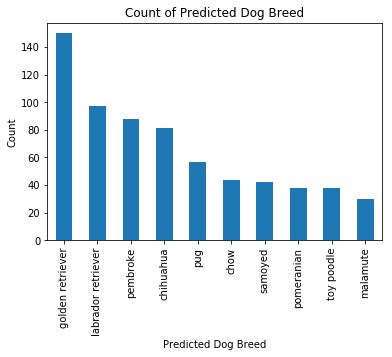

In [132]:
master_df['pred'].value_counts()[:10].plot(kind = 'bar');
plt.title("Count of Predicted Dog Breed");
plt.xlabel("Predicted Dog Breed");
plt.ylabel("Count");

In [133]:
df_pred['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
chow                  44 
Samoyed               43 
toy_poodle            39 
Pomeranian            38 
cocker_spaniel        30 
Name: p1, dtype: int64

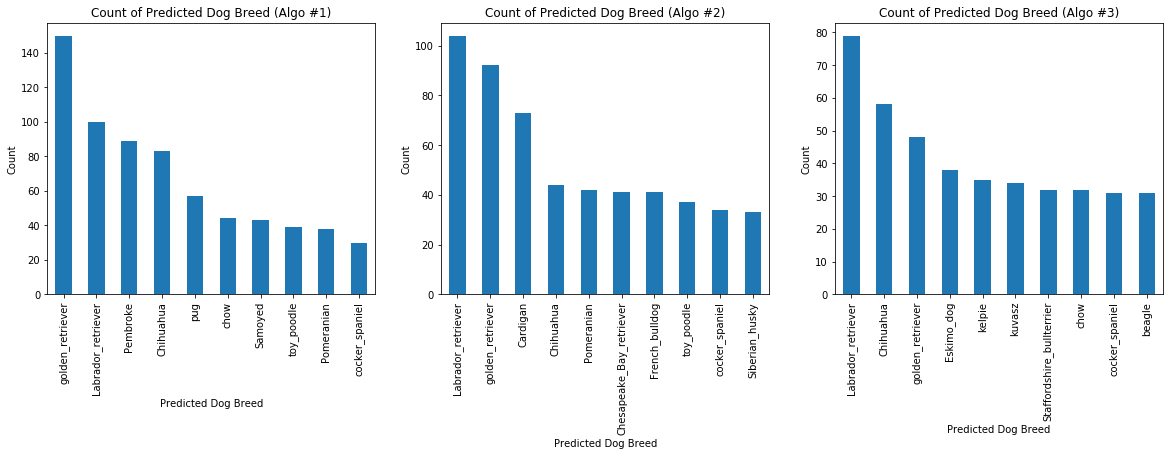

In [136]:
plt.subplot(1,3,1)
df_pred['p1'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5));
plt.title("Count of Predicted Dog Breed (Algo #1)");
plt.xlabel("Predicted Dog Breed");
plt.ylabel("Count");
plt.subplot(1,3,2)
df_pred['p2'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5));
plt.title("Count of Predicted Dog Breed (Algo #2)");
plt.xlabel("Predicted Dog Breed");
plt.ylabel("Count");
plt.subplot(1,3,3)
df_pred['p3'].value_counts()[:10].plot(kind = 'bar', figsize = (20,5));
plt.title("Count of Predicted Dog Breed (Algo #3)");
plt.xlabel("Predicted Dog Breed");
plt.ylabel("Count");

2. Based on the top 1 predictions: golden retriever, if I sort by the most retweet count as well as favorite count, I found that golden retriever is also the most popular dog.

In [137]:
dog_info = master_df[['pred','actual','retweet_count','favorite_count']]

In [138]:
dog_info1 = dog_info.groupby('pred').agg({'actual':['sum','count'],'retweet_count':'sum','favorite_count':'sum'})

In [139]:
dog_info1.sort_values([('favorite_count','sum'),('retweet_count','sum')],ascending = [False,False])[:10]

actual       retweet_count favorite_count
                      sum count           sum            sum
pred                                                        
golden retriever    150.0  150   499239        1536812      
labrador retriever  97.0   97    332233        963431       
pembroke            88.0   88    239671        903070       
chihuahua           81.0   81    211533        624324       
samoyed             42.0   42    172009        466007       
french bulldog      25.0   25    103346        424861       
chow                44.0   44    112352        368290       
pug                 57.0   57    94637         283198       
cocker spaniel      30.0   30    103807        279659       
pomeranian          38.0   38    91897         275744

3. Checking predictions accuracy, based on the cleaned data, the total accuracy is around 73.8% with golden retriever  100% accuracy.

In [140]:
dog_pred = dog_info1['actual'].reset_index()

In [141]:
dog_pred['percentage'] = dog_pred['sum']/dog_pred['count']

In [142]:
dog_pred.sort_values(by=['percentage','sum'],ascending = False)[:10]

,pred,sum,count,percentage
139,golden retriever,150.0,150,1.0
186,labrador retriever,97.0,97,1.0
249,pembroke,88.0,88,1.0
77,chihuahua,81.0,81,1.0
265,pug,57.0,57,1.0
80,chow,44.0,44,1.0
282,samoyed,42.0,42,1.0
259,pomeranian,38.0,38,1.0
343,toy poodle,38.0,38,1.0
85,cocker spaniel,30.0,30,1.0


In [143]:
dog_pred['sum'].sum()

1520.0

In [144]:
total_acc = dog_pred['sum'].sum()/dog_pred['count'].sum()
print("Based on cleaned data, prediction accuracy is {:.2f}%".format(total_acc*100))

Based on cleaned data, prediction accuracy is 73.82%
